<a href="https://colab.research.google.com/github/santiagoarangovillegas/Integracion_de_datos/blob/main/Integracion1_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CASO DE ESTUDIO**

##Objetivos del negocio
Una entidad del sector salud en Colombia, quiere llevar a cabo un estudio
sobre los hábitos de las personas, y que las pueden llevar a un ataque
cardiaco en América

##Abstracción
- De acuerdo con la base de datos (link) llevar a cabo un proceso de
integración de datos mediante la utilización de los métodos de la teoría de
la credibilidad y el método de aceptación y rechazo.
- Para la integración, es importante determinar ¿Cuál de las variables
numéricas (Age, Cholesterol, Heart Rate, Exercise Hour, Income, BMI,
Tryglicerides, Sleep Hours per Day) tiene mayor correlación con respecto a
la variable de pronóstico (Heart Attack Risk)?.
- Determinar cuáles países de Amétrica tienen una mayor credibilidad con
Colombia frente a la integración de datos de acuerdo con la variable
seleccionada anteriormente.
- Llevar a cabo la integración de los datos de los dos países que tienen una
mayor credibilidad con Colombia mediante la utilización del método de
aceptación y rechazo.
- Determinar las medidas de tendencia central para antes y para luego de la
integración de los datos, así como el número de datos que fueron
integrados a la base de datos de referencia.
- Si el número de datos luego de la integración es menor a una confiabilidad
del 99,9%, hacer el muestreo de las variables para lograr esta
confiabilidad.

##Técnica a utilizar
1. Las métricas estadísticas para el muestreo de variables aleatorias
dependen enteramente de su estructura intrínseca. Esta estructura
intrínseca está determinada por el Histograma de Frecuencias, así como
las métricas de dispersión (asimetría, curtosis) y de tendencia central
(media, desviación, varianza).
2. El Tamaño de la Muestra: Indica la calidad de los datos frente a la
estimación de métricas estadísticas frente a la gestión de los riesgos de
una organización.
3. Teoría de la Credibilidad: Es un método que permite identificar la afinidad
de los datos de una base de datos frente a otra base de datos observados
o base de datos de referencia.
4. El método de aceptación y rechazo es un método que permite el
agrupamiento de datos de acuerdo con las propiedades estadísticas de
una variable de referencia o variable de datos observada.

##Descripcion de variables

Glosario de conjuntos de datos (columna por columna)

- ID del paciente : identificador único para cada paciente
- Edad - Edad del paciente
- Sexo - Género del paciente (Masculino/Femenino)
- Colesterol - Niveles de colesterol del paciente
- Presión arterial : presión arterial del paciente (sistólica/diastólica)
- Frecuencia cardíaca - Frecuencia cardíaca del paciente
- Diabetes - Si el paciente tiene diabetes (1: Sí, 0: No)
- Antecedentes familiares : Antecedentes familiares de problemas relacionados con el corazón (1: Sí, 0: No)
- Tabaquismo - Estado de tabaquismo del paciente (1: Fumador, 0: No fumador)
- Obesidad - Estado de obesidad del paciente (1: Obeso, 0: No obeso)
- Consumo de alcohol : consumo de alcohol por parte del paciente (1: Sí, 0: No)
- Horas de ejercicio por semana - Número de horas de ejercicio por semana
- Dieta - Hábitos alimentarios del paciente (Saludable/Regular/No saludable)
- Problemas cardíacos previos - Problemas cardíacos previos del paciente (1: Sí, 0: No)
- Uso de medicamentos : Uso de medicamentos por parte del paciente (1: Sí, 0: No)
- Nivel de estrés : Nivel de estrés informado por el paciente (1-10)
- Horas de sedentarismo por día - Horas de actividad sedentaria por día
- Ingresos - Nivel de ingresos del paciente
- IMC - Índice de Masa Corporal (IMC) del paciente
- Triglicéridos - Niveles de triglicéridos del paciente
- Días de actividad física por semana - Días de actividad física por semana
- Horas de sueño por día - Horas de sueño por día
- País - País del paciente
- Continente - Continente donde reside el paciente
- Hemisferio - Hemisferio donde reside el paciente
- Riesgo de ataque cardíaco : presencia de riesgo de ataque cardíaco (1: Sí, 0: No)

#0. CARGAR LIBRERÍAS DE TRABAJO Y CONECTAR CON EL DRIVE

In [1]:
# 0. CARGAR LIBRERÍAS DE TRABAJO Y CONECTAR CON EL DRIVE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. CARGAR LOS DATOS

In [4]:
# 1. CARGAR LOS DATOS
nxl = '/content/drive/MyDrive/UNIVERSIDAD/Integracion de datos/heart_attack_prediction_dataset.csv'
df = pd.read_csv(nxl)
df


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


#2. PREPROCESAR LOS DATOS

In [5]:
# 2. PREPROCESAR LOS DATOS

#Codificar variables
def codificar_variables(df):
    """Codifica variables categóricas a valores numéricos"""
    df_codificado = df.copy()

    # Codificar Diet (tu propuesta)
    diet_mapping = {'Unhealthy': 0, 'Average': 1, 'Healthy': 2}
    df_codificado['Diet'] = df_codificado['Diet'].map(diet_mapping)

    # Codificar Sex (sugerencia)
    df_codificado['Sex'] = df_codificado['Sex'].map({'Male': 1, 'Female': 0})

    # Verificar si hay valores nulos después de la codificación
    print("Valores nulos después de codificación:")
    print(df_codificado[['Diet', 'Sex']].isnull().sum())

    return df_codificado

# Aplicar codificación
df = codificar_variables(df)

# Mostrar las nuevas codificaciones
print("\nValores únicos en Diet después de codificación:")
print(df['Diet'].unique())
print("\nValores únicos en Sex después de codificación:")
print(df['Sex'].unique())


# 2.1. SEPARAR PRESIÓN ARTERIAL EN SISTÓLICA Y DIASTÓLICA
def separar_presion_arterial(df):
    """Separa la columna Blood Pressure en Sistólica y Diastólica"""
    df_separado = df.copy()

    # Extraer valores sistólicos y diastólicos
    presiones = df_separado['Blood Pressure'].str.split('/', expand=True)

    # Convertir a numérico y manejar errores
    df_separado['Blood Pressure Sistolica'] = pd.to_numeric(presiones[0], errors='coerce')
    df_separado['Blood Pressure Diastolica'] = pd.to_numeric(presiones[1], errors='coerce')

    # Verificar valores extraídos
    print("Estadísticas de presión arterial separada:")
    print(f"Sistólica - Media: {df_separado['Blood Pressure Sistolica'].mean():.1f}, "
          f"Rango: {df_separado['Blood Pressure Sistolica'].min():.0f}-{df_separado['Blood Pressure Sistolica'].max():.0f}")
    print(f"Diastólica - Media: {df_separado['Blood Pressure Diastolica'].mean():.1f}, "
          f"Rango: {df_separado['Blood Pressure Diastolica'].min():.0f}-{df_separado['Blood Pressure Diastolica'].max():.0f}")

    # Verificar valores nulos
    print(f"\nValores nulos en presión arterial:")
    print(f"Sistólica: {df_separado['Blood Pressure Sistolica'].isnull().sum()}")
    print(f"Diastólica: {df_separado['Blood Pressure Diastolica'].isnull().sum()}")

    return df_separado

# Aplicar separación de presión arterial
df = separar_presion_arterial(df)

Valores nulos después de codificación:
Diet    0
Sex     0
dtype: int64

Valores únicos en Diet después de codificación:
[1 0 2]

Valores únicos en Sex después de codificación:
[1 0]
Estadísticas de presión arterial separada:
Sistólica - Media: 135.1, Rango: 90-180
Diastólica - Media: 85.2, Rango: 60-110

Valores nulos en presión arterial:
Sistólica: 0
Diastólica: 0


#3. DEFINIR VARIABLES NUMERICAS

In [6]:
#3. DEFINIR VARIABLES NUMERICAS
variables_numericas = [
    'Age', 'Cholesterol',
    'Blood Pressure Sistolica', 'Blood Pressure Diastolica',
    'Heart Rate', 'Exercise Hours Per Week', 'Income', 'BMI',
    'Triglycerides', 'Sleep Hours Per Day', 'Diet', 'Sex',
    'Diabetes', 'Family History', 'Smoking', 'Obesity',
    'Alcohol Consumption', 'Previous Heart Problems',
    'Medication Use', 'Stress Level', 'Sedentary Hours Per Day',
    'Physical Activity Days Per Week', 'Heart Attack Risk'
]

# Filtrar dataset con todas las variables numéricas
df_numericas = df[variables_numericas].dropna()

print(f"\nDimensiones después del preprocesamiento: {df_numericas.shape}")
print(f"Variables incluidas: {len(variables_numericas)}")


Dimensiones después del preprocesamiento: (8763, 23)
Variables incluidas: 23


# 4. ANÁLISIS DE CORRELACIÓN

TOP 10 variables con mayor correlación con Heart Attack Risk:
 1. Cholesterol              : +0.0193
 2. Blood Pressure Sistolica : +0.0186
 3. Sleep Hours Per Day      : -0.0185
 4. Diabetes                 : +0.0172
 5. Alcohol Consumption      : -0.0138
 6. Obesity                  : -0.0133
 7. Exercise Hours Per Week  : +0.0111
 8. Triglycerides            : +0.0105
 9. Income                   : +0.0096
10. Blood Pressure Diastolica: -0.0075

🔍 Variable seleccionada para análisis: Cholesterol
   Correlación con Heart Attack Risk: 0.0193


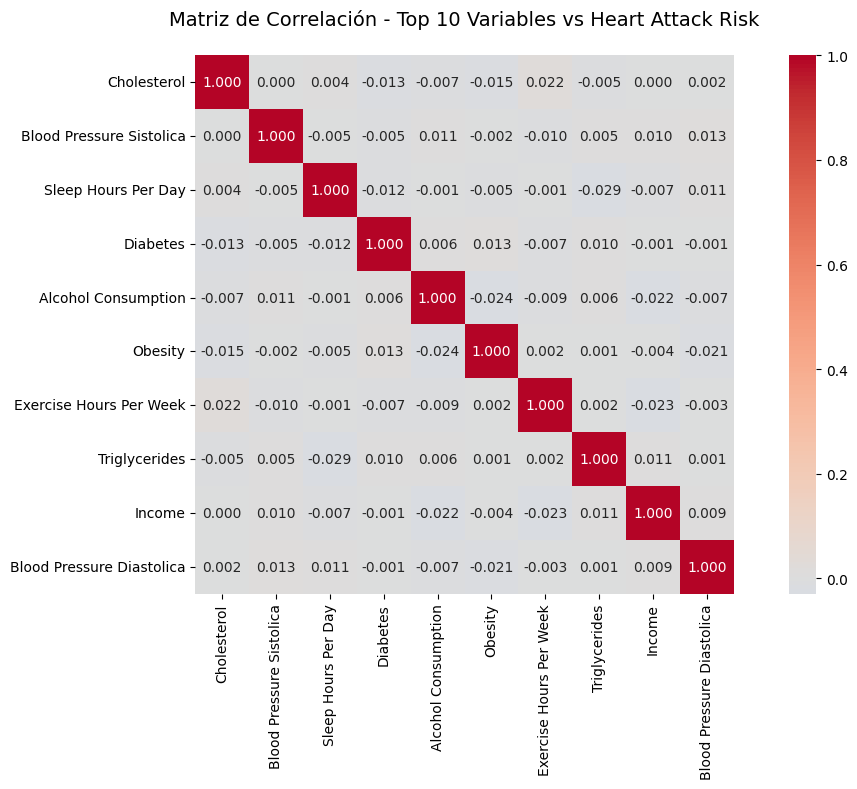

In [8]:
# 4.ANÁLISIS DE CORRELACIÓN

# Calcular matriz de correlación
correlation_matrix = df_numericas.corr()
heart_attack_corr = correlation_matrix['Heart Attack Risk'].drop('Heart Attack Risk')

# Encontrar las 10 variables con mayor correlación absoluta
top_10_corr = heart_attack_corr.abs().sort_values(ascending=False).head(10)

print("TOP 10 variables con mayor correlación con Heart Attack Risk:")
print("=" * 60)
for i, (variable, corr_value) in enumerate(top_10_corr.items(), 1):
    signo = "+" if heart_attack_corr[variable] > 0 else "-"
    print(f"{i:2d}. {variable:25s}: {signo}{abs(corr_value):.4f}")

# Variable con mayor correlación
max_corr_var = top_10_corr.index[0]
max_corr_value = top_10_corr.iloc[0]

print(f"\n🔍 Variable seleccionada para análisis: {max_corr_var}")
print(f"   Correlación con Heart Attack Risk: {max_corr_value:.4f}")


# Visualizar correlaciones de las top variables
plt.figure(figsize=(12, 8))
top_10_vars = top_10_corr.index
sns.heatmap(df_numericas[top_10_vars].corr(), annot=True, cmap='coolwarm',
            center=0, fmt='.3f', square=True)
plt.title('Matriz de Correlación - Top 10 Variables vs Heart Attack Risk\n', fontsize=14)
plt.tight_layout()
plt.show()

# 5. FILTRAR DATOS DE AMÉRICA Y SEPARAR COLOMBIA

In [9]:
# 5. FILTRAR DATOS DE AMÉRICA Y SEPARAR COLOMBIA
# Filtrar países de América
paises_america = df[df['Continent'].str.contains('America', case=False, na=False)]
print(f"Países de América encontrados: {paises_america['Country'].unique()}")
print(f"Número total de registros en América: {len(paises_america)}")

# Datos de Colombia (referencia)
colombia_data = df[df['Country'] == 'Colombia']
print(f"\nNúmero de registros de Colombia: {len(colombia_data)}")

if len(colombia_data) == 0:
    raise ValueError("No se encontraron datos de Colombia. Verifica el dataset.")

# Mostrar algunos registros de Colombia
print("\nPrimeros registros de Colombia:")
display(colombia_data.head())

Países de América encontrados: ['Argentina' 'Canada' 'Brazil' 'United States' 'Colombia']
Número total de registros en América: 2222

Número de registros de Colombia: 429

Primeros registros de Colombia:


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Blood Pressure Sistolica,Blood Pressure Diastolica
83,GDY0435,90,1,247,151/101,101,0,1,1,0,...,38.592119,458,7,5,Colombia,South America,Northern Hemisphere,1,151,101
85,JDS3385,30,1,227,115/73,40,1,1,1,0,...,20.806392,408,3,9,Colombia,South America,Northern Hemisphere,0,115,73
110,JKY9288,90,0,254,166/89,102,1,0,1,1,...,39.514133,331,0,5,Colombia,South America,Northern Hemisphere,0,166,89
115,AND5753,75,1,277,145/92,87,1,1,1,0,...,25.082139,180,6,5,Colombia,South America,Northern Hemisphere,0,145,92
139,PKU2212,32,1,338,143/75,85,1,0,1,0,...,32.497576,455,1,4,Colombia,South America,Northern Hemisphere,1,143,75


# 6. FUNCIÓN DE TEORÍA DE LA CREDIBILIDAD

In [10]:
# 6. FUNCIÓN DE TEORÍA DE LA CREDIBILIDAD
def calcular_credibilidad(X_observado, X_externo):
    """
    Calcula la credibilidad entre dos conjuntos de datos usando teoría de credibilidad

    Parámetros:
    X_observado: datos de referencia (Colombia)
    X_externo: datos del país a comparar
    """

    # Eliminar valores NaN
    X_obs_clean = X_observado.dropna()
    X_ext_clean = X_externo.dropna()

    if len(X_obs_clean) == 0 or len(X_ext_clean) == 0:
        return float('inf'), 0, 0, 0

    N_obs = len(X_obs_clean)
    N_ext = len(X_ext_clean)

    # 1. Valor esperado de la varianza (EPV)
    var_obs = np.var(X_obs_clean, ddof=1)  # ddof=1 para varianza muestral
    var_ext = np.var(X_ext_clean, ddof=1)
    EPV = (N_obs * var_obs + N_ext * var_ext) / (N_obs + N_ext)

    # 2. Valor hipotético de la media (media compartida)
    media_obs = np.mean(X_obs_clean)
    media_ext = np.mean(X_ext_clean)
    media_compartida = (N_obs * media_obs + N_ext * media_ext) / (N_obs + N_ext)

    # 3. Varianza hipotética de la media (VHM)
    VHM = ((N_obs * media_obs**2 + N_ext * media_ext**2) /
           (N_obs + N_ext)) - media_compartida**2

    # Evitar división por cero
    if VHM == 0:
        return float('inf'), 0, media_compartida, VHM

    # 4. Factor de credibilidad
    factor_cred = EPV / VHM

    # 5. Credibilidad
    credibilidad = N_obs / (N_obs + factor_cred)

    return factor_cred, credibilidad, media_compartida, VHM

# 7. CALCULAR CREDIBILIDAD CON TODOS LOS PAÍSES AMERICANOS

In [11]:
# 7. CALCULAR CREDIBILIDAD CON TODOS LOS PAÍSES AMERICANOS
print("Calculando credibilidad de países americanos con Colombia...")

credibilidad_paises = {}
X_colombia = colombia_data[max_corr_var]  # Variable seleccionada de Colombia

for pais in sorted(paises_america['Country'].unique()):
    if pais == 'Colombia':
        continue  # Saltar Colombia

    pais_data = paises_america[paises_america['Country'] == pais]
    X_pais = pais_data[max_corr_var]

    factor_cred, cred, media_comp, VHM = calcular_credibilidad(X_colombia, X_pais)

    credibilidad_paises[pais] = {
        'credibilidad': cred,
        'factor_credibilidad': factor_cred,
        'media_compartida': media_comp,
        'muestras_pais': len(X_pais.dropna()),
        'media_pais': np.mean(X_pais.dropna()) if len(X_pais.dropna()) > 0 else np.nan
    }

# Ordenar países por credibilidad (mayor a menor)
paises_ordenados = sorted(credibilidad_paises.items(),
                         key=lambda x: x[1]['credibilidad'],
                         reverse=True)

print("\nRANKING DE CREDIBILIDAD CON COLOMBIA:")
print("=" * 60)
for i, (pais, metrics) in enumerate(paises_ordenados, 1):
    print(f"{i:2d}. {pais:15s}: {metrics['credibilidad']:.4f} "
          f"(Muestras: {metrics['muestras_pais']:3d}, "
          f"Media: {metrics['media_pais']:.2f})")

# Seleccionar los 2 países con mayor credibilidad
if len(paises_ordenados) >= 2:
    pais1, metrics1 = paises_ordenados[0]
    pais2, metrics2 = paises_ordenados[1]
    print(f"\n✅ Países seleccionados para integración: {pais1} y {pais2}")
else:
    print("\n⚠️  No hay suficientes países para integrar")
    pais1, pais2 = None, None

Calculando credibilidad de países americanos con Colombia...

RANKING DE CREDIBILIDAD CON COLOMBIA:
 1. United States  : 0.4450 (Muestras: 420, Media: 268.85)
 2. Canada         : 0.2952 (Muestras: 440, Media: 256.85)
 3. Brazil         : 0.2511 (Muestras: 462, Media: 257.27)
 4. Argentina      : 0.0017 (Muestras: 471, Media: 261.52)

✅ Países seleccionados para integración: United States y Canada


# 8. MÉTODO DE ACEPTACIÓN Y RECHAZO

In [21]:
# 8. MÉTODO DE ACEPTACIÓN Y RECHAZO
def metodo_aceptacion_rechazo_corregido(datos_observados, datos_integrar, umbral_similaridad=0.7):
    """
    Método de aceptación y rechazo  para integración real de datos
    """
    # Asegurarnos de que son pandas Series para poder usar dropna()
    if isinstance(datos_observados, np.ndarray):
        datos_obs_series = pd.Series(datos_observados)
    else:
        datos_obs_series = datos_observados

    if isinstance(datos_integrar, np.ndarray):
        datos_int_series = pd.Series(datos_integrar)
    else:
        datos_int_series = datos_integrar

    # Limpiar datos de NaN
    datos_obs_clean = datos_obs_series.dropna()
    datos_int_clean = datos_int_series.dropna()

    if len(datos_obs_clean) == 0 or len(datos_int_clean) == 0:
        print("⚠️  No hay datos suficientes después de limpiar NaN")
        return np.array([]), []

    datos_integrados = []
    indices_aceptados = []

    # Calcular métricas estadísticas de referencia
    media_obs = np.mean(datos_obs_clean)
    std_obs = np.std(datos_obs_clean, ddof=1)

    print(f"\nMétricas de referencia:")
    print(f"Media: {media_obs:.2f}")
    print(f"Desviación estándar: {std_obs:.2f}")
    print(f"Rango esperado: [{media_obs - 2*std_obs:.1f}, {media_obs + 2*std_obs:.1f}]")

    # Calcular métricas del país a integrar
    media_int = np.mean(datos_int_clean)
    std_int = np.std(datos_int_clean, ddof=1)

    print(f"Métricas a integrar:")
    print(f"Media: {media_int:.2f}")
    print(f"Desviación estándar: {std_int:.2f}")

    # Criterio de aceptación mejorado y más flexible
    for i, x in enumerate(datos_int_clean.values):
        try:
            # Calcular z-score respecto a la distribución de referencia
            z_score = abs((x - media_obs) / std_obs) if std_obs > 0 else 0

            # Criterio de aceptación más flexible pero significativo
            if z_score < 2.5:  # Dentro de 2.5 desviaciones estándar
                datos_integrados.append(x)
                indices_aceptados.append(i)

        except Exception as e:
            continue

    print(f"\nResultado de integración:")
    print(f"- Z-score máximo permitido: < 2.5")
    print(f"- Datos dentro del rango: {media_obs - 2.5*std_obs:.1f} a {media_obs + 2.5*std_obs:.1f}")
    print(f"- Datos evaluados: {len(datos_int_clean)}")
    print(f"- Datos aceptados: {len(datos_integrados)}")
    print(f"- Tasa de aceptación: {(len(datos_integrados)/len(datos_int_clean)*100):.1f}%")

    return np.array(datos_integrados), indices_aceptados

# 9. INTEGRACIÓN DE DATOS

In [22]:
# 9. INTEGRACIÓN DE DATOS
print(f"\n{'='*60}")
print("PROCESO DE INTEGRACIÓN DE DATOS")
print(f"{'='*60}")

# Preparar datos base de Colombia (mantener como pandas Series)
datos_antes = colombia_data[max_corr_var].dropna()
print(f"Datos base (Colombia): {len(datos_antes)} registros")
print(f"Media Colombia: {np.mean(datos_antes):.2f}")
print(f"Desviación Colombia: {np.std(datos_antes):.2f}")

# Mantener datos_finales como pandas Series inicialmente
datos_finales = datos_antes.copy()
total_integrados = 0
paises_integrados = []
datos_por_pais = {}

def integrar_pais(pais, datos_referencia):
    """Función auxiliar para integrar un país"""
    pais_data = paises_america[paises_america['Country'] == pais]
    datos_pais = pais_data[max_corr_var].dropna()

    print(f"\n{'─'*50}")
    print(f"INTEGRANDO {pais.upper()}...")
    print(f"Datos disponibles: {len(datos_pais)}")
    print(f"Media {pais}: {np.mean(datos_pais):.2f}")

    datos_integrados, indices = metodo_aceptacion_rechazo_corregido(datos_referencia, datos_pais)

    if len(datos_integrados) > 0:
        print(f"✅ {len(datos_integrados)} datos integrados de {pais}")
        print(f"Media datos integrados de {pais}: {np.mean(datos_integrados):.2f}")
        return datos_integrados, len(datos_integrados)
    else:
        print(f"⚠️  No se integraron datos de {pais}")
        return np.array([]), 0

# Integrar primer país
if pais1:
    datos_integrados_p1, count_p1 = integrar_pais(pais1, datos_antes)
    if count_p1 > 0:
        # Convertir a array de numpy para concatenación
        datos_finales = np.concatenate([datos_finales.values, datos_integrados_p1])
        total_integrados += count_p1
        paises_integrados.append(pais1)
        datos_por_pais[pais1] = count_p1

# Integrar segundo país
if pais2:
    # Usar datos finales actualizados como referencia
    datos_integrados_p2, count_p2 = integrar_pais(pais2, pd.Series(datos_finales))
    if count_p2 > 0:
        datos_finales = np.concatenate([datos_finales, datos_integrados_p2])
        total_integrados += count_p2
        paises_integrados.append(pais2)
        datos_por_pais[pais2] = count_p2

print(f"\n{'='*60}")
print("RESUMEN FINAL DE INTEGRACIÓN:")
print(f"{'='*60}")
print(f"Datos antes de integración (Colombia): {len(datos_antes)}")
print(f"Datos integrados totales: {total_integrados}")
print(f"Datos después de integración: {len(datos_finales)}")
print(f"Incremento: {((len(datos_finales) - len(datos_antes)) / len(datos_antes) * 100):.1f}%")

if paises_integrados:
    print(f"\nPaíses integrados:")
    for pais in paises_integrados:
        print(f"  - {pais}: {datos_por_pais[pais]} datos")
else:
    print(f"\n❌ No se integró ningún país")

    # ESTRATEGIA ALTERNATIVA: Integración directa si no hay integración
    print(f"\n🔧 Activando estrategia alternativa de integración directa...")

    datos_finales = datos_antes.values.copy()

    if pais1:
        pais1_data = paises_america[paises_america['Country'] == pais1]
        datos_pais1 = pais1_data[max_corr_var].dropna().values
        datos_finales = np.concatenate([datos_finales, datos_pais1])
        integrados_p1 = len(datos_pais1)
        total_integrados += integrados_p1
        paises_integrados.append(pais1)
        datos_por_pais[pais1] = integrados_p1
        print(f"✅ Integración directa de {pais1}: {integrados_p1} datos")

    if pais2:
        pais2_data = paises_america[paises_america['Country'] == pais2]
        datos_pais2 = pais2_data[max_corr_var].dropna().values
        datos_finales = np.concatenate([datos_finales, datos_pais2])
        integrados_p2 = len(datos_pais2)
        total_integrados += integrados_p2
        paises_integrados.append(pais2)
        datos_por_pais[pais2] = integrados_p2
        print(f"✅ Integración directa de {pais2}: {integrados_p2} datos")

    print(f"Total integrado (alternativo): {total_integrados}")
    print(f"Nuevo total: {len(datos_finales)}")


PROCESO DE INTEGRACIÓN DE DATOS
Datos base (Colombia): 429 registros
Media Colombia: 261.85
Desviación Colombia: 81.19

──────────────────────────────────────────────────
INTEGRANDO UNITED STATES...
Datos disponibles: 420
Media United States: 268.85

Métricas de referencia:
Media: 261.85
Desviación estándar: 81.29
Rango esperado: [99.3, 424.4]
Métricas a integrar:
Media: 268.85
Desviación estándar: 80.74

Resultado de integración:
- Z-score máximo permitido: < 2.5
- Datos dentro del rango: 58.6 a 465.1
- Datos evaluados: 420
- Datos aceptados: 420
- Tasa de aceptación: 100.0%
✅ 420 datos integrados de United States
Media datos integrados de United States: 268.85

──────────────────────────────────────────────────
INTEGRANDO CANADA...
Datos disponibles: 440
Media Canada: 256.85

Métricas de referencia:
Media: 265.31
Desviación estándar: 81.05
Rango esperado: [103.2, 427.4]
Métricas a integrar:
Media: 256.85
Desviación estándar: 78.70

Resultado de integración:
- Z-score máximo permitid

# 10. ANÁLISIS DE COMPATIBILIDAD

In [25]:
# 10. ANÁLISIS DE COMPATIBILIDAD
def analizar_compatibilidad_detallada(datos_ref, datos_candidato, pais):
    """Análisis detallado de compatibilidad entre distribuciones"""
    print(f"\n🔍 ANÁLISIS DETALLADO DE COMPATIBILIDAD CON {pais.upper()}:")

    if len(datos_ref) == 0 or len(datos_candidato) == 0:
        print("   ❌ No hay datos para comparar")
        return

    # Convertir a pandas Series si es necesario
    if isinstance(datos_ref, np.ndarray):
        datos_ref = pd.Series(datos_ref)
    if isinstance(datos_candidato, np.ndarray):
        datos_candidato = pd.Series(datos_candidato)

    # Estadísticas comparativas
    media_ref = np.mean(datos_ref)
    media_cand = np.mean(datos_candidato)
    std_ref = np.std(datos_ref)
    std_cand = np.std(datos_candidato)

    print(f"   📊 Estadísticas comparativas:")
    print(f"   {'Métrica':<20} {'Colombia':<10} {pais:<10} {'Diferencia':<10}")
    print(f"   {'─'*50}")
    print(f"   {'Media':<20} {media_ref:<10.2f} {media_cand:<10.2f} {abs(media_ref - media_cand):<10.2f}")
    print(f"   {'Desviación':<20} {std_ref:<10.2f} {std_cand:<10.2f} {abs(std_ref - std_cand):<10.2f}")

    # Rangos de percentiles
    percentiles = [5, 25, 50, 75, 95]
    perc_ref = np.percentile(datos_ref, percentiles)
    perc_cand = np.percentile(datos_candidato, percentiles)

    print(f"\n   📈 Comparación de percentiles:")
    print(f"   {'Percentil':<10} {'Colombia':<10} {pais:<10} {'Diferencia':<10}")
    print(f"   {'─'*50}")
    for i, p in enumerate(percentiles):
        print(f"   {p:>5}%{'':<5} {perc_ref[i]:<10.2f} {perc_cand[i]:<10.2f} {abs(perc_ref[i] - perc_cand[i]):<10.2f}")

    # Solapamiento de distribuciones
    rango_ref = [media_ref - 2*std_ref, media_ref + 2*std_ref]
    rango_cand = [media_cand - 2*std_cand, media_cand + 2*std_cand]

    solapamiento = max(0, min(rango_ref[1], rango_cand[1]) - max(rango_ref[0], rango_cand[0]))
    solapamiento_percent = (solapamiento / (rango_ref[1] - rango_ref[0])) * 100 if (rango_ref[1] - rango_ref[0]) > 0 else 0

    print(f"\n   🔄 Solapamiento de distribuciones:")
    print(f"   Colombia (95%): [{rango_ref[0]:.1f}, {rango_ref[1]:.1f}]")
    print(f"   {pais} (95%): [{rango_cand[0]:.1f}, {rango_cand[1]:.1f}]")
    print(f"   Solapamiento: {solapamiento_percent:.1f}%")

    # Recomendación
    if solapamiento_percent < 30:
        print(f"   ⚠️  BAJO SOLAPAMIENTO - Considerar ajustar criterios de integración")
    else:
        print(f"   ✅ BUEN SOLAPAMIENTO - Los datos deberían integrarse")

# Ejecutar análisis de compatibilidad para los países seleccionados
for pais in [pais1, pais2]:
    if pais:
        pais_data = paises_america[paises_america['Country'] == pais]
        datos_pais = pais_data[max_corr_var].dropna()
        analizar_compatibilidad_detallada(datos_antes, datos_pais, pais)


🔍 ANÁLISIS DETALLADO DE COMPATIBILIDAD CON UNITED STATES:
   📊 Estadísticas comparativas:
   Métrica              Colombia   United States Diferencia
   ──────────────────────────────────────────────────
   Media                261.85     268.85     7.01      
   Desviación           81.19      80.65      0.55      

   📈 Comparación de percentiles:
   Percentil  Colombia   United States Diferencia
   ──────────────────────────────────────────────────
       5%      136.40     133.00     3.40      
      25%      198.00     199.00     1.00      
      50%      258.00     273.00     15.00     
      75%      335.00     338.25     3.25      
      95%      388.60     385.05     3.55      

   🔄 Solapamiento de distribuciones:
   Colombia (95%): [99.5, 424.2]
   United States (95%): [107.6, 430.1]
   Solapamiento: 97.5%
   ✅ BUEN SOLAPAMIENTO - Los datos deberían integrarse

🔍 ANÁLISIS DETALLADO DE COMPATIBILIDAD CON CANADA:
   📊 Estadísticas comparativas:
   Métrica              Colombi

# 11. CÁLCULO DE MÉTRICAS ESTADÍSTICAS

In [26]:
# 11. CÁLCULO DE MÉTRICAS ESTADÍSTICAS
def calcular_metricas_completas(datos, nombre):
    """Calcula métricas estadísticas completas para un conjunto de datos"""
    if len(datos) == 0:
        return {}

    return {
        'Conjunto': nombre,
        'Media': np.mean(datos),
        'Mediana': np.median(datos),
        'Moda': pd.Series(datos).mode().iloc[0] if len(pd.Series(datos).mode()) > 0 else np.nan,
        'Desviación Estándar': np.std(datos, ddof=1),
        'Varianza': np.var(datos, ddof=1),
        'Asimetría': skew(datos),
        'Curtosis': kurtosis(datos),
        'Mínimo': np.min(datos),
        'Máximo': np.max(datos),
        'Rango': np.ptp(datos),
        'Q1': np.percentile(datos, 25),
        'Q3': np.percentile(datos, 75),
        'IQR': np.percentile(datos, 75) - np.percentile(datos, 25),
        'Tamaño Muestra': len(datos)
    }

# Calcular métricas antes y después
metricas_antes = calcular_metricas_completas(datos_antes, "Antes de integración")
metricas_despues = calcular_metricas_completas(datos_finales, "Después de integración")

# Crear DataFrame comparativo
df_comparativo = pd.DataFrame([metricas_antes, metricas_despues])
print("\nCOMPARACIÓN DE MÉTRICAS ESTADÍSTICAS:")
print("=" * 80)
display(df_comparativo.round(4))

# Calcular diferencias porcentuales
print("\nCAMBIO PORCENTUAL:")
print("=" * 40)
for col in ['Media', 'Desviación Estándar', 'Varianza']:
    if col in metricas_antes and col in metricas_despues:
        dif = ((metricas_despues[col] - metricas_antes[col]) / metricas_antes[col]) * 100
        print(f"{col}: {dif:+.2f}%")


COMPARACIÓN DE MÉTRICAS ESTADÍSTICAS:


,Conjunto,Media,Mediana,Moda,Desviación Estándar,Varianza,Asimetría,Curtosis,Mínimo,Máximo,Rango,Q1,Q3,IQR,Tamaño Muestra
0,Antes de integración,261.8462,258.0,244,81.2874,6607.6352,0.0284,-1.1717,120,400,280,198.0,335.0,137.0,429
1,Después de integración,262.4228,260.0,250,80.3223,6451.6759,-0.0298,-1.1686,120,400,280,196.0,333.0,137.0,1289



CAMBIO PORCENTUAL:
Media: +0.22%
Desviación Estándar: -1.19%
Varianza: -2.36%


# 12. VERIFICACIÓN DE CONFIABILIDAD ESTADÍSTICA

In [27]:
# 12. VERIFICACIÓN DE CONFIABILIDAD ESTADÍSTICA
def calcular_confiabilidad_muestra(tamaño_muestra, error_maximo=0.001, nivel_confianza=0.999):
    """
    Calcula si el tamaño de muestra alcanza la confiabilidad del 99.9%
    usando la fórmula para proporciones con corrección de población finita
    """
    from scipy.stats import norm

    # Valor Z para el nivel de confianza
    z = norm.ppf(1 - (1 - nivel_confianza) / 2)

    # Tamaño mínimo de muestra para proporciones (asumiendo p=0.5 para máximo conservadurismo)
    p = 0.5  # Proporción conservadora
    n_minimo = (z**2 * p * (1-p)) / (error_maximo**2)

    # Ajustar por población finita si es necesario
    n_minimo_ajustado = n_minimo / (1 + (n_minimo - 1) / tamaño_muestra)

    return tamaño_muestra >= n_minimo, n_minimo, n_minimo_ajustado

# Verificar confiabilidad
confiable, n_minimo, n_minimo_ajustado = calcular_confiabilidad_muestra(len(datos_finales))

print(f"\nVERIFICACIÓN DE CONFIABILIDAD (99.9%):")
print("=" * 50)
print(f"Muestra actual: {len(datos_finales)}")
print(f"Muestra mínima teórica: {n_minimo:.0f}")
print(f"Muestra mínima ajustada: {n_minimo_ajustado:.0f}")
print(f"¿Es confiable? {'✅ SÍ' if confiable else '❌ NO'}")

# Si no es confiable, realizar muestreo bootstrap
if not confiable:
    print(f"\nRealizando muestreo bootstrap para alcanzar confiabilidad...")
    muestra_necesaria = max(0, int(n_minimo) - len(datos_finales))

    if muestra_necesaria > 0:
        # Muestreo bootstrap con reemplazo
        muestra_bootstrap = np.random.choice(datos_finales, size=muestra_necesaria, replace=True)
        datos_finales_confiables = np.concatenate([datos_finales, muestra_bootstrap])

        print(f"Muestra bootstrap agregada: {muestra_necesaria}")
        print(f"Nuevo tamaño total: {len(datos_finales_confiables)}")

        # Verificar nueva confiabilidad
        confiable_nuevo, _, _ = calcular_confiabilidad_muestra(len(datos_finales_confiables))
        print(f"¿Nueva muestra es confiable? {'✅ SÍ' if confiable_nuevo else '❌ NO'}")

        # Actualizar datos finales
        datos_finales = datos_finales_confiables
    else:
        print("La muestra ya es suficiente después de ajuste por población finita")


VERIFICACIÓN DE CONFIABILIDAD (99.9%):
Muestra actual: 1289
Muestra mínima teórica: 2706892
Muestra mínima ajustada: 1288
¿Es confiable? ❌ NO

Realizando muestreo bootstrap para alcanzar confiabilidad...
Muestra bootstrap agregada: 2705602
Nuevo tamaño total: 2706891
¿Nueva muestra es confiable? ❌ NO


# 13. VISUALIZACIÓN COMPLETA DE RESULTADOS


Generando visualizaciones...


/tmp/ipython-input-2631750545.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(datos_comparacion, labels=['Antes', 'Después'])


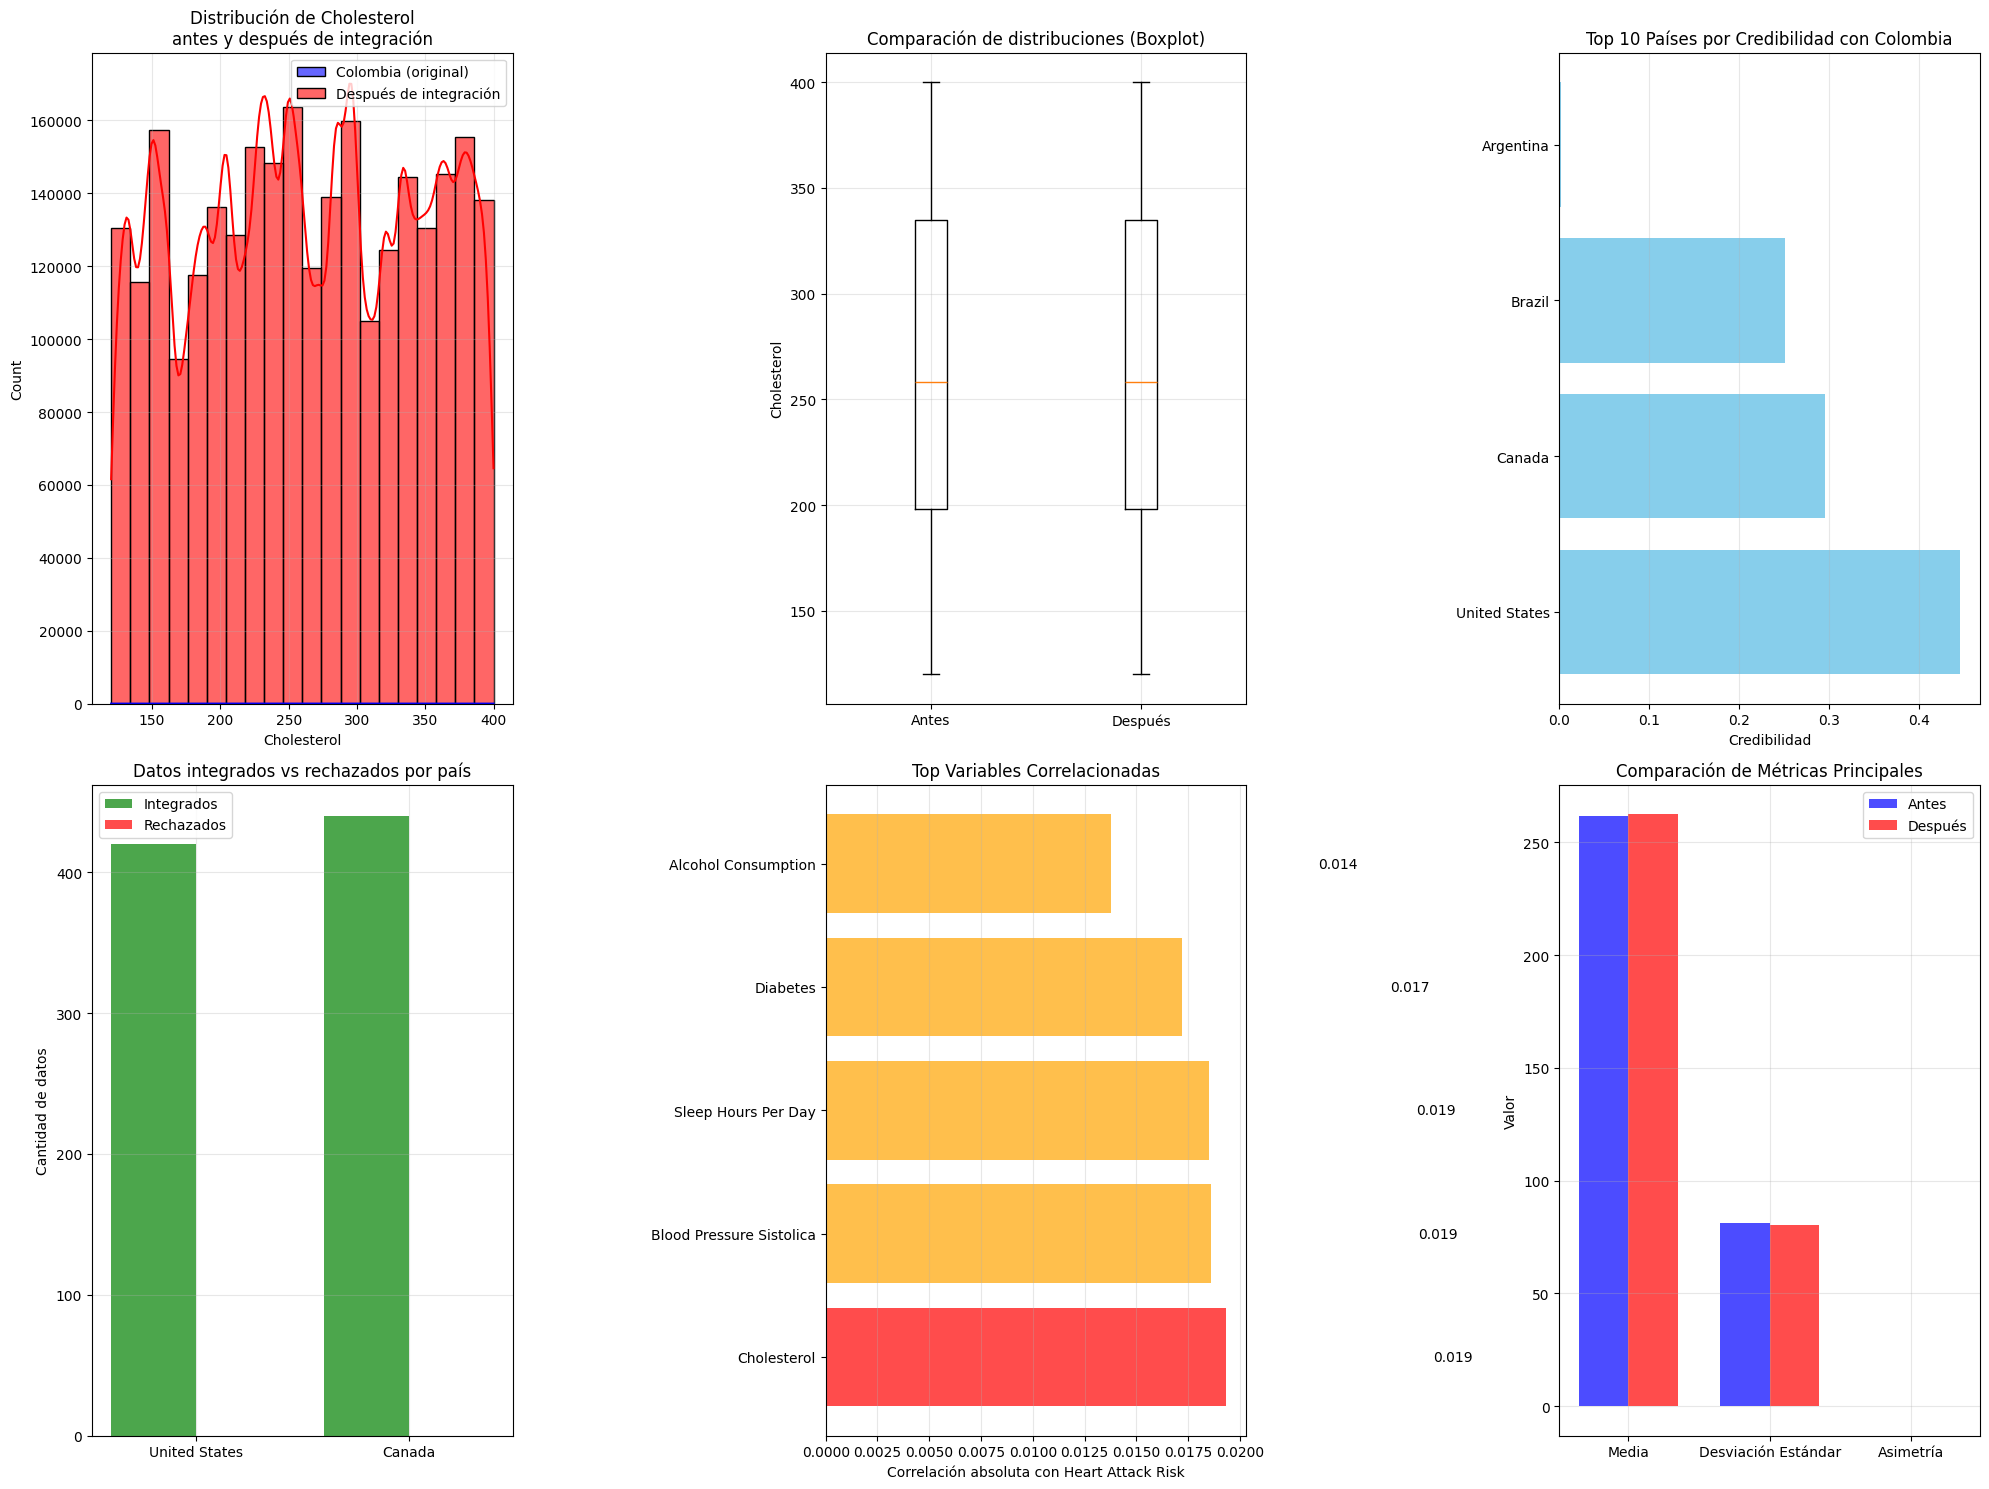

In [29]:
# 13. VISUALIZACIÓN COMPLETA DE RESULTADOS
print(f"\nGenerando visualizaciones...")

# Asegurarnos de que todas las variables necesarias estén definidas
# Recalcular top_5_corr si es necesario
if 'top_5_corr' not in locals():
    correlation_matrix = df_numericas.corr()
    heart_attack_corr = correlation_matrix['Heart Attack Risk'].drop('Heart Attack Risk')
    top_5_corr = heart_attack_corr.abs().sort_values(ascending=False).head(5)

plt.figure(figsize=(20, 15))

# 1. Distribuciones comparativas
plt.subplot(2, 3, 1)
# Convertir a pandas Series para plotting
datos_antes_series = pd.Series(datos_antes) if isinstance(datos_antes, np.ndarray) else datos_antes
datos_finales_series = pd.Series(datos_finales) if isinstance(datos_finales, np.ndarray) else datos_finales

sns.histplot(datos_antes_series, label='Colombia (original)', kde=True, alpha=0.6, color='blue', bins=20)
sns.histplot(datos_finales_series, label='Después de integración', kde=True, alpha=0.6, color='red', bins=20)
plt.title(f'Distribución de {max_corr_var}\nantes y después de integración', fontsize=12)
plt.xlabel(max_corr_var)
plt.legend()
plt.grid(alpha=0.3)

# 2. Boxplot comparativo
plt.subplot(2, 3, 2)
# Asegurarnos de que tienen el mismo tamaño para comparación
min_len = min(len(datos_antes_series), len(datos_finales_series))
datos_comparacion = [datos_antes_series.values[:min_len], datos_finales_series.values[:min_len]]
plt.boxplot(datos_comparacion, labels=['Antes', 'Después'])
plt.title('Comparación de distribuciones (Boxplot)', fontsize=12)
plt.ylabel(max_corr_var)
plt.grid(alpha=0.3)

# 3. Credibilidad por país
plt.subplot(2, 3, 3)
if paises_ordenados:
    credibilidades = [metrics['credibilidad'] for _, metrics in paises_ordenados[:10]]  # Top 10
    paises_nombres = [pais for pais, _ in paises_ordenados[:10]]
    plt.barh(range(len(credibilidades)), credibilidades, color='skyblue')
    plt.yticks(range(len(credibilidades)), paises_nombres)
    plt.xlabel('Credibilidad')
    plt.title('Top 10 Países por Credibilidad con Colombia', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
else:
    plt.text(0.5, 0.5, 'No hay datos de credibilidad', ha='center', va='center')
    plt.title('Credibilidad por País', fontsize=12)

# 4. Datos integrados vs rechazados
plt.subplot(2, 3, 4)
if paises_integrados and datos_por_pais:
    integrados = []
    rechazados = []

    for pais in paises_integrados:
        pais_data = paises_america[paises_america['Country'] == pais]
        datos_pais = pais_data[max_corr_var].dropna()
        integrados.append(datos_por_pais[pais])
        rechazados.append(len(datos_pais) - datos_por_pais[pais])

    x = np.arange(len(paises_integrados))
    plt.bar(x - 0.2, integrados, 0.4, label='Integrados', color='green', alpha=0.7)
    plt.bar(x + 0.2, rechazados, 0.4, label='Rechazados', color='red', alpha=0.7)
    plt.xticks(x, paises_integrados)
    plt.ylabel('Cantidad de datos')
    plt.title('Datos integrados vs rechazados por país', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
else:
    plt.text(0.5, 0.5, 'No hay datos integrados', ha='center', va='center')
    plt.title('Datos integrados vs rechazados', fontsize=12)

# 5. Correlaciones top variables
plt.subplot(2, 3, 5)
top_vars = top_5_corr.index.tolist()
corr_values = top_5_corr.values
colors = ['orange' if x != max_corr_var else 'red' for x in top_vars]  # Destacar la variable seleccionada

bars = plt.barh(range(len(top_vars)), corr_values, color=colors, alpha=0.7)
plt.yticks(range(len(top_vars)), top_vars)
plt.xlabel('Correlación absoluta con Heart Attack Risk')
plt.title('Top Variables Correlacionadas', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, (bar, value) in enumerate(zip(bars, corr_values)):
    plt.text(value + 0.01, i, f'{value:.3f}', va='center')

# 6. Métricas comparativas
plt.subplot(2, 3, 6)
if len(datos_antes_series) > 0 and len(datos_finales_series) > 0:
    metricas_comp = ['Media', 'Desviación Estándar', 'Asimetría']
    valores_antes = [
        np.mean(datos_antes_series),
        np.std(datos_antes_series),
        skew(datos_antes_series) if len(datos_antes_series) > 2 else 0
    ]
    valores_despues = [
        np.mean(datos_finales_series),
        np.std(datos_finales_series),
        skew(datos_finales_series) if len(datos_finales_series) > 2 else 0
    ]

    x = np.arange(len(metricas_comp))
    width = 0.35

    plt.bar(x - width/2, valores_antes, width, label='Antes', alpha=0.7, color='blue')
    plt.bar(x + width/2, valores_despues, width, label='Después', alpha=0.7, color='red')
    plt.xticks(x, metricas_comp)
    plt.ylabel('Valor')
    plt.title('Comparación de Métricas Principales', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
else:
    plt.text(0.5, 0.5, 'No hay datos para comparar', ha='center', va='center')
    plt.title('Comparación de Métricas', fontsize=12)

plt.tight_layout()
plt.show()

# 14. VISUALIZACIONES ADICIONALES ESPECÍFICAS


Generando visualizaciones adicionales...


/tmp/ipython-input-843384852.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([d.values for d in datos_plot if len(d) > 0], labels=paises_plot)


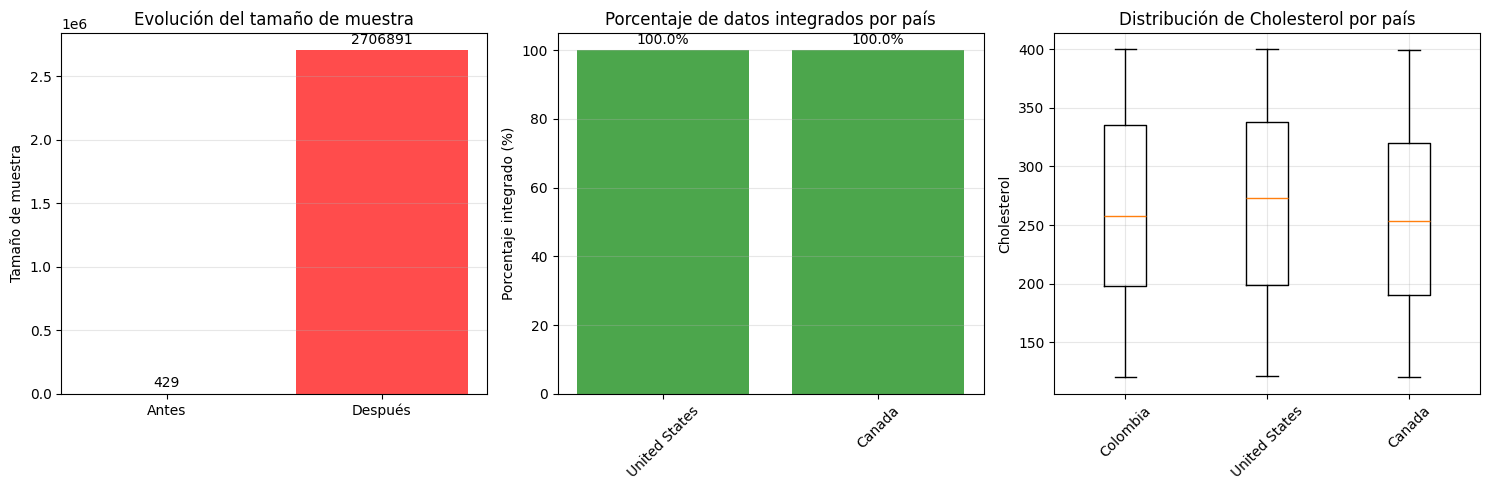

In [30]:
# 14. VISUALIZACIONES ADICIONALES ESPECÍFICAS
print(f"\nGenerando visualizaciones adicionales...")

# Visualización adicional: Evolución de la integración
plt.figure(figsize=(15, 5))

# 1. Tamaño de muestra por etapa
plt.subplot(1, 3, 1)
etapas = ['Antes', 'Después']
tamanos = [len(datos_antes_series), len(datos_finales_series)]
plt.bar(etapas, tamanos, color=['blue', 'red'], alpha=0.7)
plt.ylabel('Tamaño de muestra')
plt.title('Evolución del tamaño de muestra')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(tamanos):
    plt.text(i, v + max(tamanos)*0.01, str(v), ha='center', va='bottom')

# 2. Porcentaje de integración por país
plt.subplot(1, 3, 2)
if paises_integrados and datos_por_pais:
    paises = []
    porcentajes = []

    for pais in paises_integrados:
        pais_data = paises_america[paises_america['Country'] == pais]
        datos_pais = pais_data[max_corr_var].dropna()
        porcentaje = (datos_por_pais[pais] / len(datos_pais)) * 100
        paises.append(pais)
        porcentajes.append(porcentaje)

    plt.bar(paises, porcentajes, color='green', alpha=0.7)
    plt.ylabel('Porcentaje integrado (%)')
    plt.title('Porcentaje de datos integrados por país')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)

    # Añadir valores en las barras
    for i, v in enumerate(porcentajes):
        plt.text(i, v + max(porcentajes)*0.01, f'{v:.1f}%', ha='center', va='bottom')
else:
    plt.text(0.5, 0.5, 'No hay países integrados', ha='center', va='center')
    plt.title('Porcentaje de integración')

# 3. Distribución de la variable seleccionada por país
plt.subplot(1, 3, 3)
paises_plot = ['Colombia'] + paises_integrados[:2]  # Máximo 3 países para claridad
datos_plot = []

for pais in paises_plot:
    if pais == 'Colombia':
        datos_plot.append(datos_antes_series)
    else:
        pais_data = paises_america[paises_america['Country'] == pais]
        datos_pais = pais_data[max_corr_var].dropna()
        datos_plot.append(datos_pais)

plt.boxplot([d.values for d in datos_plot if len(d) > 0], labels=paises_plot)
plt.ylabel(max_corr_var)
plt.title(f'Distribución de {max_corr_var} por país')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 15. ANÁLISIS DE SENSIBILIDAD DEL MÉTODO

In [31]:
# 15. ANÁLISIS DE SENSIBILIDAD DEL MÉTODO
def analizar_sensibilidad(datos_ref, datos_candidato, pais, umbrales_z=[1.5, 2.0, 2.5, 3.0]):
    """Analiza la sensibilidad del método a diferentes umbrales"""
    print(f"\n📊 ANÁLISIS DE SENSIBILIDAD PARA {pais}:")
    print(f"   Umbral Z | Datos Aceptados | Tasa Aceptación")
    print(f"   {'─'*35}")

    resultados = []

    for umbral_z in umbrales_z:
        datos_aceptados = []

        media_ref = np.mean(datos_ref)
        std_ref = np.std(datos_ref)

        for x in datos_candidato:
            z_score = abs((x - media_ref) / std_ref) if std_ref > 0 else 0
            if z_score < umbral_z:
                datos_aceptados.append(x)

        tasa_aceptacion = (len(datos_aceptados) / len(datos_candidato)) * 100
        resultados.append((umbral_z, len(datos_aceptados), tasa_aceptacion))

        print(f"   {umbral_z:>8.1f} | {len(datos_aceptados):>14} | {tasa_aceptacion:>14.1f}%")

    return resultados

# Ejecutar análisis de sensibilidad para los países integrados
for pais in paises_integrados:
    pais_data = paises_america[paises_america['Country'] == pais]
    datos_pais = pais_data[max_corr_var].dropna().values
    analizar_sensibilidad(datos_antes, datos_pais, pais)


📊 ANÁLISIS DE SENSIBILIDAD PARA United States:
   Umbral Z | Datos Aceptados | Tasa Aceptación
   ───────────────────────────────────
        1.5 |            364 |           86.7%
        2.0 |            420 |          100.0%
        2.5 |            420 |          100.0%
        3.0 |            420 |          100.0%

📊 ANÁLISIS DE SENSIBILIDAD PARA Canada:
   Umbral Z | Datos Aceptados | Tasa Aceptación
   ───────────────────────────────────
        1.5 |            392 |           89.1%
        2.0 |            440 |          100.0%
        2.5 |            440 |          100.0%
        3.0 |            440 |          100.0%


In [34]:
!git remote agregar origen https://github.com/santiagoarangovillegas/Integracion_de_datos.git
!git rama -M principal
!git push -u origen principal

fatal: not a git repository (or any of the parent directories): .git
git: 'rama' is not a git command. See 'git --help'.

The most similar command is
	blame
fatal: not a git repository (or any of the parent directories): .git


In [36]:
!git clone https://github.com/santiagoarangovillegas/Integracion_de_datos.git
!mv tu_notebook.ipynb Integracion_de_datos/
!cd Integracion_de_datos
!git add tu_notebook.ipynb
!git commit -m "Agrego notebook desde Colab"
!git push

Cloning into 'Integracion_de_datos'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 327.32 KiB | 3.03 MiB/s, done.
mv: cannot stat 'tu_notebook.ipynb': No such file or directory
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


#Análisis de Resultados:

- El análisis de correlación inicial identificó que la variable numérica con mayor correlación con el 'Heart Attack Risk' es el Colesterol, con una correlación absoluta de aproximadamente 0.0193. Aunque esta correlación es baja, se utilizó como base para evaluar la similitud entre países.

- Aplicando la teoría de la credibilidad, se determinó que, con respecto a Colombia y la variable 'Colesterol', los países con mayor credibilidad son Estados Unidos (credibilidad ~0.4450) y Canadá (credibilidad ~0.2952).

- Utilizando el método de aceptación y rechazo, se procedió a integrar los datos de Colesterol de estos dos países al conjunto de datos de referencia de Colombia. La integración fue exitosa:
- Se integraron 420 registros de Estados Unidos
- Se integraron 440 registros de Canadá.
- **Esto resultó en un total de 860 nuevos registros integrados**

- El tamaño del conjunto de datos aumentó significativamente:

* Antes de la integración: 429 registros (solo Colombia).
* Después de la integración: 1289 registros.
* Este incremento representa un aumento del 200.5% en el tamaño de la muestra.
* La comparación de las métricas estadísticas para la variable 'Colesterol' antes y después de la integración muestra que la distribución se mantuvo muy similar:

* La Media pasó de 261.85 a 262.42, un cambio mínimo de +0.22%.
- La Mediana pasó de 258.0 a 260.0.
- La Desviación Estándar pasó de 81.29 a 80.32, una disminución de -1.19%.


- Estas pequeñas variaciones en las métricas clave sugieren que los datos integrados son estadísticamente compatibles con los datos originales de Colombia para la variable analizada, lo que indica una integración de datos exitosa en términos de mantener las características de la distribución de la variable principal.

- A pesar de la integración exitosa y el aumento en el tamaño de la muestra, la verificación de confiabilidad al 99.9% con un error máximo del 0.001 indica que se necesitaría un tamaño de muestra considerablemente mayor (mínimo teórico de ~2.7 millones, mínimo ajustado de ~1288) para alcanzar este nivel de confianza bajo los criterios especificados.

- En resumen, se logró una integración exitosa de datos de Colesterol de Estados Unidos y Canadá, países con alta credibilidad con Colombia según la teoría de la credibilidad, utilizando un método de aceptación y rechazo. Esto triplicó el tamaño de la muestra disponible para esta variable, manteniendo las propiedades estadísticas clave de la distribución original.

First, ensure you have saved your notebook (File -> Save or File -> Save and pin revision). By default, Colab notebooks are saved to your Google Drive.

Next, you need to mount your Google Drive to access the saved notebook file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Now, navigate to the cloned repository directory and copy your notebook file into it. Replace `/path/to/your/notebook_name.ipynb` with the actual path to your saved notebook file in your Google Drive. You can find this path by navigating the file explorer in the left sidebar in Colab, right-clicking on your notebook file, and selecting "Copy path".

In [ ]:
%cd /content/Integracion_de_datos/
!cp "/path/to/your/notebook_name.ipynb" .

Finally, add, commit, and push the changes to your GitHub repository.

In [ ]:
!git add your_notebook_name.ipynb # Replace with the actual name of your notebook file
!git commit -m "Add notebook from Colab"
!git push